In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *

F_geo = lambda x,p: np.floor(np.log(1-x)/np.log(1-p))
Trans = lambda x: 10**(-0.2*x/10)


# one repeater

In [92]:

# L1 = 30
# p1 = Trans(L1)
# L2 = 20
# p2 = Trans(L2)
# N1_list = F_geo(np.random.rand(Niter),p1)
# N2_list = F_geo(np.random.rand(Niter),p2)
T0_list = [0]
p_list = np.linspace(0.01,0.99,20)
Niter = 100
rates = np.zeros((len(p_list),len(T0_list),Niter))
for i_N, T0 in enumerate(T0_list):
    for i_p, p in enumerate(p_list):
#         N1_list = F_geo(np.random.rand(Niter),p)
#         N2_list = F_geo(np.random.rand(Niter),p)
        N1 = F_geo(np.random.rand(),p)
        N2 = F_geo(np.random.rand(),p)
        for i_r in range(Niter):
#             if np.abs(N1_list[i_r]-N2_list[i_r])<= T0:
#                 rates[i_p,i_N,i_r] = 1+np.max([N1_list[i_r],N2_list[i_r]])
            total_time = np.max([N1,N2])
            if np.abs(N1-N2)<= T0:
                rates[i_p,i_N,i_r] += 1
            else:
                if N1<N2:
                    N1 = N2+ F_geo(np.random.rand(),p)
                else:
                    N2 = F_geo(np.random.rand(),p)
                    
                

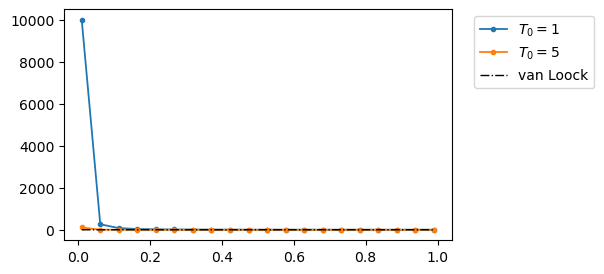

In [108]:
T0_list = [1,5]
p_list = np.linspace(0.01,0.99,20)
duration = np.zeros((len(p_list),len(T0_list)))
Nmax = 100
for i_N, T0 in enumerate(T0_list):
    for i_p, p in enumerate(p_list):
        for n1 in range(1,Nmax):
            for n2 in range(1,Nmax):
                prob = p * (1-p)**(n1-1) * p * (1-p)**(n2-1)
                if n1>n2:
                    if n1 <=T0:
                        duration[i_p,i_N] += prob* n1
                else:
                    if n2 <=T0:
                        duration[i_p,i_N] += prob* n2
                    
# q_list = 1- p_list
# g2 = ( (1+2*q_list)*p_list*(1-q_list**2)+(1+q_list)* (q_list*(1-q_list**2)+q_list**2 *p_list) )/(1-q_list**2)**2

plt.figure(figsize=(5,3))
# plt.plot(p_list,rates,".")
for i_N, T0 in enumerate(T0_list):
    plt.plot(p_list,1/duration[:,i_N],".-",linewidth=1.3,label=r"$T_0=%d$" % (T0))
# plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
# plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.plot(p_list,1/g2,"k-.",label="van Loock",linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.))
# plt.xlabel("p")
# plt.ylabel("e2e probability per qubit")
# # plt.legend(loc="best",frameon=False)
# plt.tight_layout()
# # plt.savefig("figs/heralding.pdf")
plt.show()   

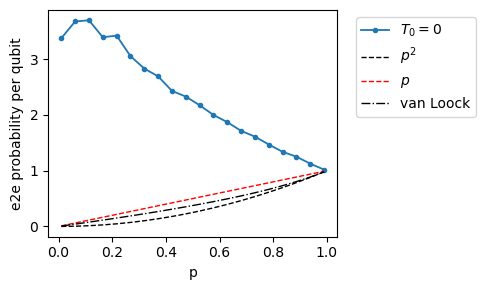

In [93]:
q_list = 1- p_list
g2 = ( (1+2*q_list)*p_list*(1-q_list**2)+(1+q_list)* (q_list*(1-q_list**2)+q_list**2 *p_list) )/(1-q_list**2)**2

plt.figure(figsize=(5,3))
# plt.plot(p_list,rates,".")
for i_N, T0 in enumerate(T0_list):
    plt.plot(p_list,1/np.mean(rates[:,i_N,:],axis=1),".-",linewidth=1.3,label=r"$T_0=%d$" % (T0))
plt.plot(p_list,p_list**2,"k--",label=r"$p^2$",linewidth=1)
plt.plot(p_list,p_list,"r--",label=r"$p$",linewidth=1)
plt.plot(p_list,1/g2,"k-.",label="van Loock",linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.))
plt.xlabel("p")
plt.ylabel("e2e probability per qubit")
# plt.legend(loc="best",frameon=False)
plt.tight_layout()
# plt.savefig("figs/heralding.pdf")
plt.show()   

2.001024 0.997484 2.0
2.0015329514240006 1.9978456697439997 2.0


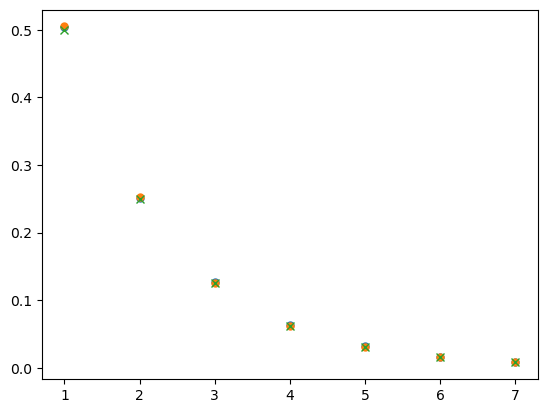

In [8]:
p = 0.5
F_geo = lambda x,p: np.floor(np.log(1-x)/np.log(1-p))
Nmax = int(1e6)
N1_list = F_geo(np.random.uniform(low=p, high=1, size=(Nmax,)),p)
N2_list = F_geo(np.random.rand(Nmax),p)
print(N1_list.mean(), N2_list.mean(),1/p)
print(N1_list.std()**2, N2_list.std()**2, (1-p)/p**2)

def plot_hist(y, label=" ", style = "-"):
    bin_arr = np.arange(4/p)+0.5
    # bin_arr = np.linspace(0,4/p,100)
    num_bins = len(bin_arr)-1
    # num_bins = int(1e3)
    n, bin_edges = np.histogram(y, bins=bin_arr)
    # n, bin_edges = np.histogram(y, bins=num_bins)
    bins_center= (bin_edges[:-1]+bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n, "o" ,markersize=5, label = label)

plt.figure()
x = np.arange(1,4/p)
plot_hist(N1_list)
plot_hist(N2_list)
plt.plot(x,p*(1-p)**(x-1),"x")
plt.show()

# plt.plot(N2_list,"o")

In [21]:
np.random.rand(Nmax)

array([0.14118443, 0.48038094, 0.01604621, ..., 0.69542566, 0.96713057,
       0.15253346])

In [26]:
len(np.argwhere(N2_list==0))

0